In [112]:
from sample_generator import *
from RobustSTL import *
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
# Load a sample dataset (Jiuzhaigou data.xlsx) as an example for demonstration.
# Readers can replace this file path with their own dataset for processing.
data = pd.read_excel('Jiuzhaigou data.xlsx')
data["tourist"] = data["tourist"].astype("float64")

# Extract the 'tourist' column values as a 1D numpy array
time_series = data['tourist'].values

# Reshape the 1D array to make it compatible for further processing
time_series = time_series.reshape(-1)

time_series


array([  208.,   295.,   311.,   528.,  2018.,   508.,   330.,   548.,
         537.,   544.,  1061.,   613.,   578.,   801.,   980.,   960.,
         942.,  1281.,  1045.,   694.,   729.,   945.,   827.,  1034.,
        1569.,  1644.,  2336.,  2065.,  2270.,  2192.,  3463.,  9998.,
       10000.,  6048.,  1641.,  1247.,  1616.,  1169.,  1445.,  1234.,
        1323.,  1442.,  1896.,  2006.,  1864.,  4017.,  2104.,  1318.,
        2315.,  2646.,  2410.,  2691.,  3682.,  2231.,  1687.,  2282.,
        2603.,  2376.,  3649.,  3715.,  2466.,  1781.,  1940.,  3448.,
        3118.,  3775.,  3957.,  3292.,  2584.,  3079.,  4799.,  4721.,
        4608.,  7519.,  4319.,  3175.,  4002.,  5717.,  4116.,  3604.,
        4586.,  2884.,  2739.,  2563.,  2386.,  4183.,  5979.,  2560.,
        2115.,  2064.,  1854.,  2274.,  2392.,  2064.,  2574.,  2813.,
        2650.,  2945.,  3020.,  3251.,  3176.,  3808.,  3791.,  3310.,
        3644.,  3928.,  3880.,  4867.,  4950.,  4867.,  5221.,  5398.,
      

In [114]:
# Standardize the time series data
mean_value = np.mean(time_series)         # Calculate the mean of the time series
std_dev = np.std(time_series)             # Calculate the standard deviation of the time series

# Calculate the standardized (z-score) series
normalized_series = (time_series - mean_value) / std_dev

normalized_series

array([-1.04367151e+00, -1.02761803e+00, -1.02466567e+00, -9.84624246e-01,
       -7.09685429e-01, -9.88314700e-01, -1.02115974e+00, -9.80933792e-01,
       -9.82963542e-01, -9.81671883e-01, -8.86273649e-01, -9.68939817e-01,
       -9.75398112e-01, -9.34249550e-01, -9.01219988e-01, -9.04910442e-01,
       -9.08231850e-01, -8.45678656e-01, -8.89226013e-01, -9.53993479e-01,
       -9.47535185e-01, -9.07678282e-01, -9.29451960e-01, -8.91255762e-01,
       -7.92536120e-01, -7.78696918e-01, -6.51007212e-01, -7.01012863e-01,
       -6.63185710e-01, -6.77578480e-01, -4.43050134e-01,  7.62805684e-01,
        7.63174729e-01,  3.39410351e-02, -7.79250486e-01, -8.51952428e-01,
       -7.83863553e-01, -8.66345198e-01, -8.15416934e-01, -8.54351223e-01,
       -8.37928703e-01, -8.15970502e-01, -7.32197198e-01, -7.11899702e-01,
       -7.38101925e-01, -3.40824560e-01, -6.93816478e-01, -8.38851317e-01,
       -6.54882189e-01, -5.93805176e-01, -6.37352533e-01, -5.85501655e-01,
       -4.02639663e-01, -

In [115]:
# Apply the RobustSTL algorithm to the standardized time series data


# input : input series
# season_len : length of seasonal period
# reg1 : first order regularization parameter for trend extraction
# reg2 : second order regularization parameter for trend extraction
# K : number of past season samples in seasonality extraction
# H : number of neighborhood in seasonality extraction
# dn1, dn2 : hyperparameter of bilateral filter in denoising step.
# ds1, ds2 : hyperparameter of bilarteral filter in seasonality extraction step.

result = RobustSTL(normalized_series, 50, reg1=10, reg2= 0.5, K=2, H=5, ds1=10)


     pcost       dcost       gap    pres   dres   k/t
 0:  3.5511e+02  6.4871e+01  3e+02  3e-17  2e-15  1e+00
 1:  3.6983e+02  9.2513e+01  3e+02  2e-16  3e-13  9e-01
 2:  3.9432e+02  1.3797e+02  3e+02  3e-16  2e-13  7e-01
 3:  3.8510e+02  2.0585e+02  2e+02  3e-16  2e-13  3e-01
 4:  3.2866e+02  2.3890e+02  9e+01  4e-16  8e-14  2e-01
 5:  3.2333e+02  2.4622e+02  8e+01  4e-16  7e-14  1e-01
 6:  2.9477e+02  2.5832e+02  4e+01  2e-16  3e-14  4e-02
 7:  2.7942e+02  2.6489e+02  1e+01  3e-16  1e-14  1e-02
 8:  2.7336e+02  2.6711e+02  6e+00  3e-16  8e-15  4e-03
 9:  2.7152e+02  2.6769e+02  4e+00  3e-16  6e-15  2e-03
10:  2.6924e+02  2.6838e+02  9e-01  3e-16  1e-14  4e-04
11:  2.6877e+02  2.6852e+02  2e-01  3e-16  2e-14  9e-05
12:  2.6864e+02  2.6856e+02  8e-02  2e-16  5e-14  3e-05
13:  2.6859e+02  2.6858e+02  7e-03  4e-16  8e-14  2e-06
14:  2.6858e+02  2.6858e+02  7e-05  3e-16  6e-14  3e-08
Optimal solution found.
[!]  2 iteration will strat
     pcost       dcost       gap    pres   dres   k/t


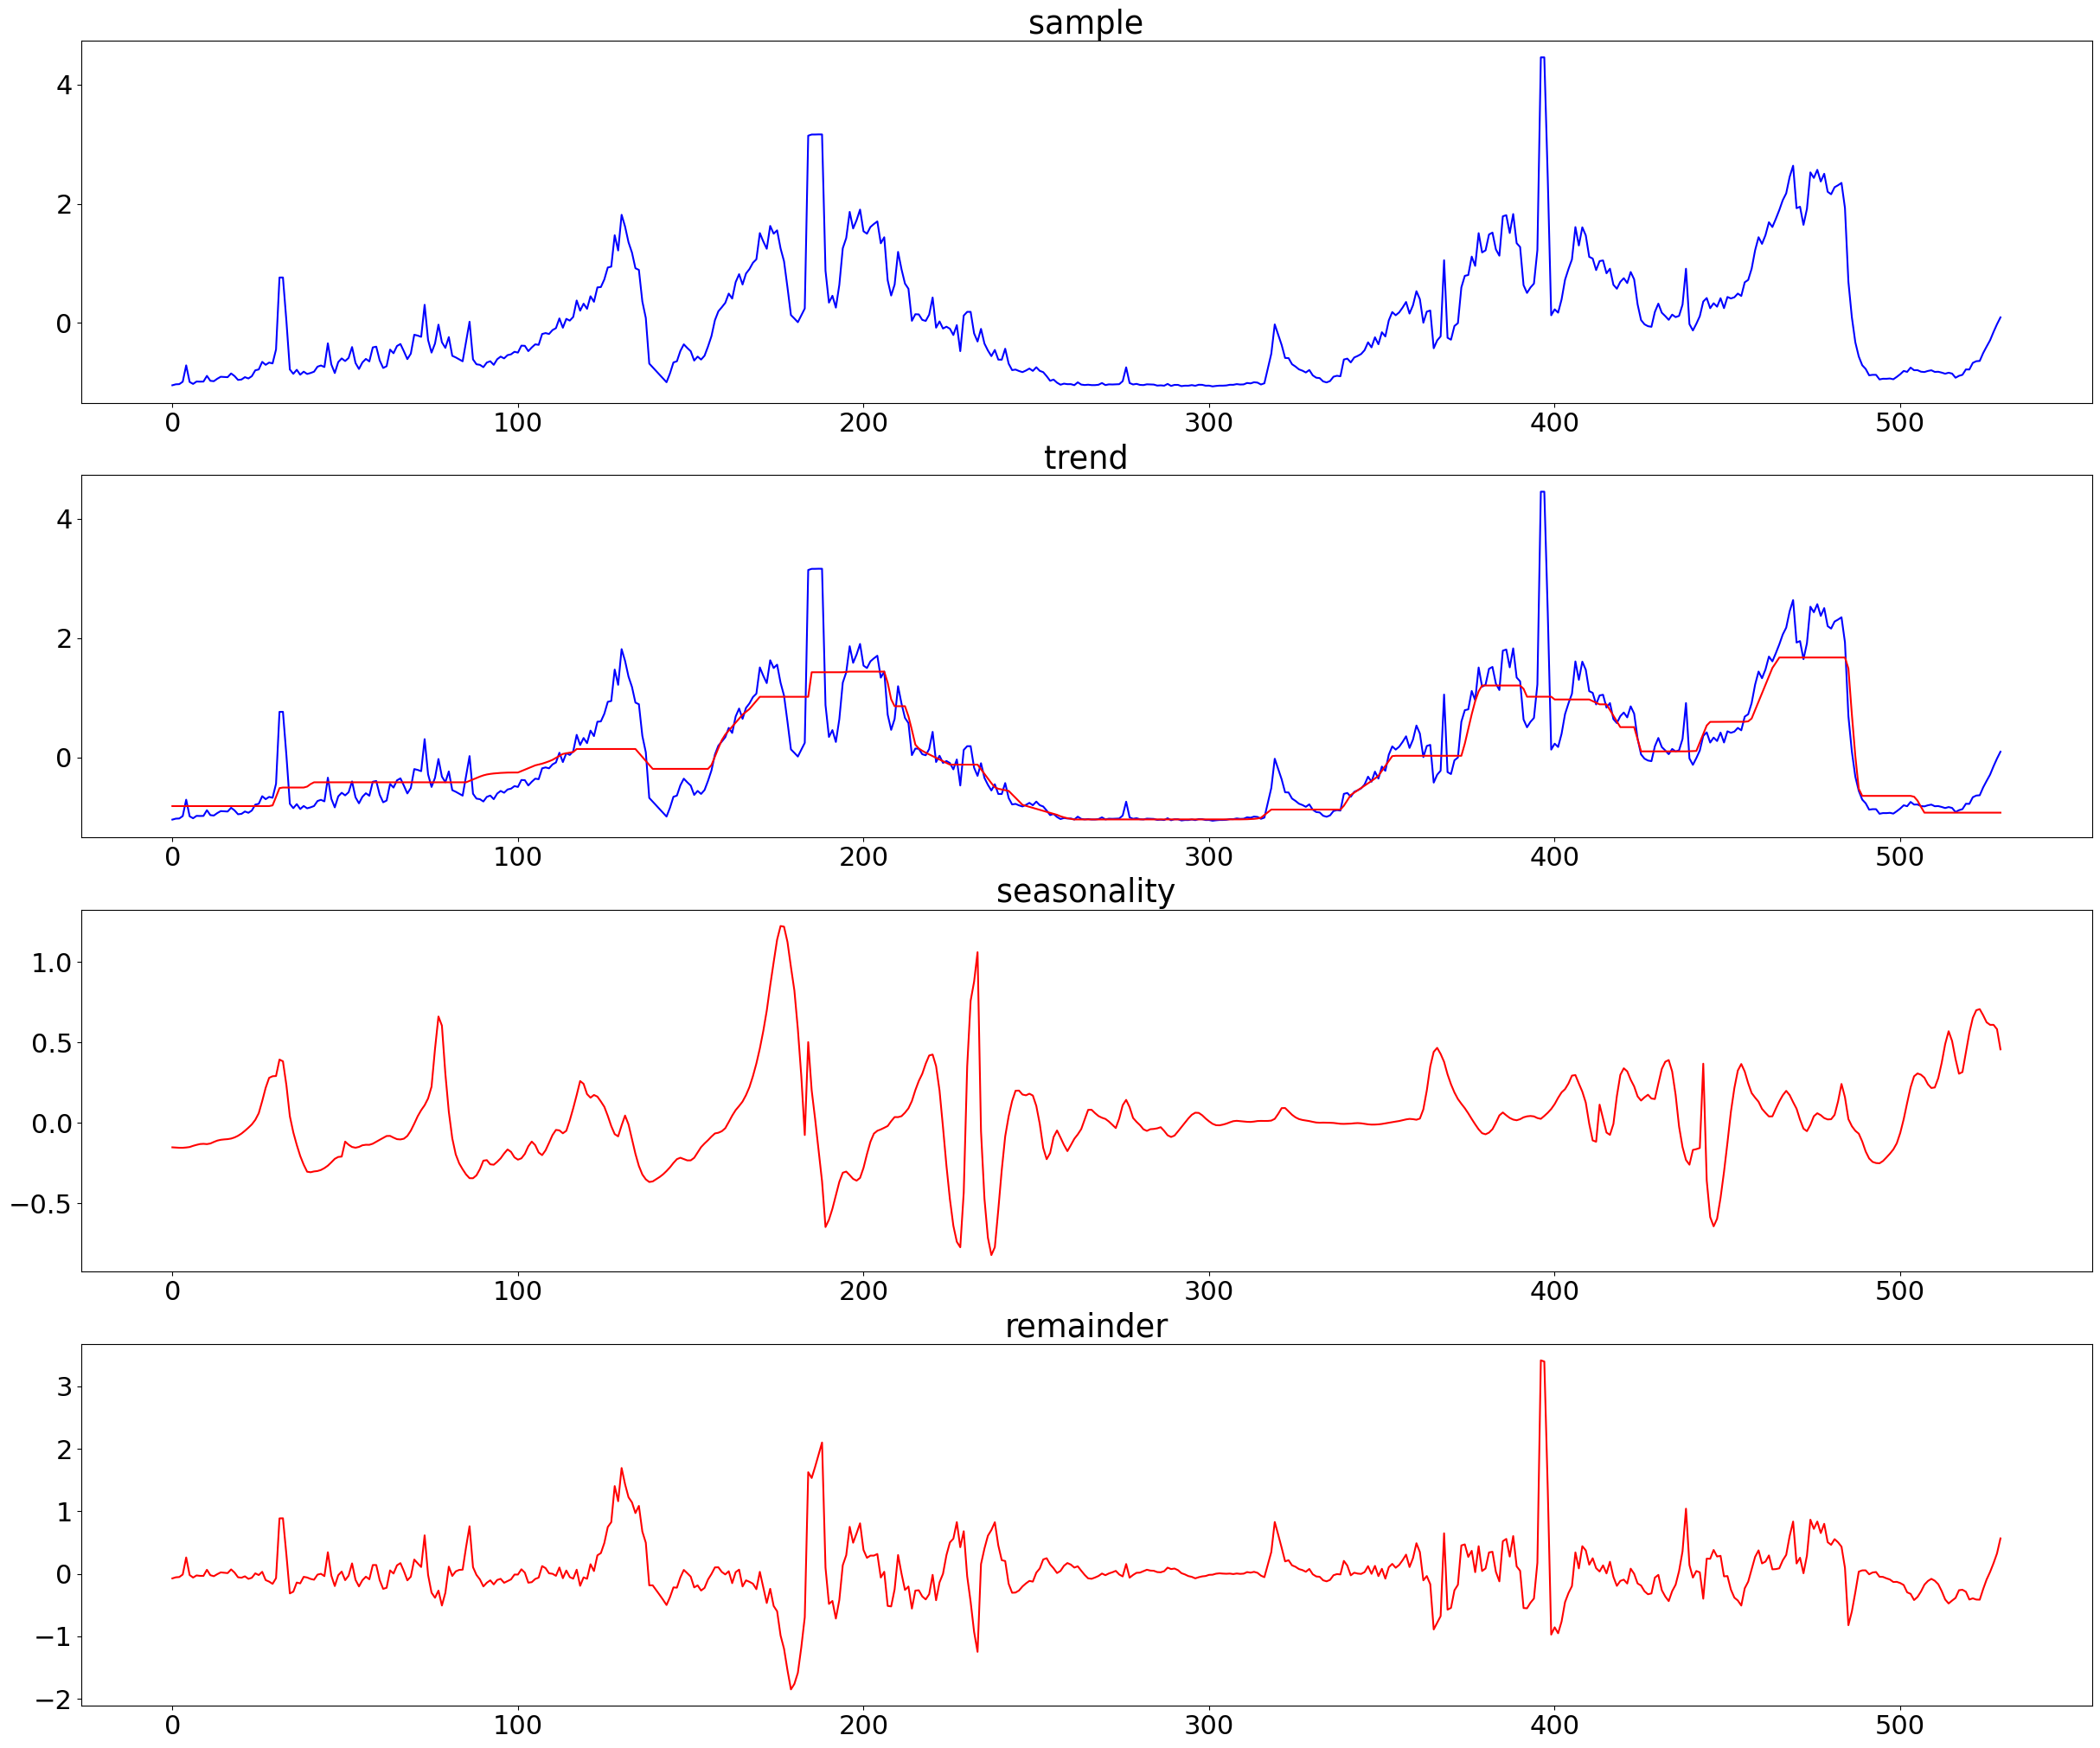

In [116]:
# Create a large figure for displaying the RobustSTL components
fig = plt.figure(figsize=(30, 25))

# Update font size for better readability
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

# Create a zip object to iterate through RobustSTL components and labels
samples = zip(result, ['sample', 'trend', 'seasonality', 'remainder'])

# Iterate through the components and plot them
for i, item in enumerate(samples):
    plt.subplot(4, 1, (i+1))
    if i == 0:
        plt.plot(item[0], color='blue')
        plt.title(item[1])
        plt.subplot(4, 1, i+2)
        plt.plot(item[0], color='blue')
    else:
        plt.plot(item[0], color='red')
        plt.title(item[1])

# Show the plots
plt.show()


In [117]:
# Extract the trend, seasonal, and residual components from the RobustSTL result
trend = result[1]
seasonal = result[2]  
resid = result[3]

# De-standardize the components to obtain the original values
original_trend = trend_array * std_dev + mean_value
original_seasonal = seasonal_array * std_dev + mean_value
original_resid = resid_array * std_dev + mean_value

# Reconstruct the time series by adding the original components
reconstructed_series = original_trend + original_seasonal + original_resid
reconstructed_series


array([11936.12075472, 12023.12075472, 12039.12075472, 12256.12075472,
       13746.12075472, 12236.12075472, 12058.12075472, 12276.12075472,
       12265.12075472, 12272.12075472, 12789.12075472, 12341.12075472,
       12306.12075472, 12529.12075472, 12708.12075472, 12688.12075472,
       12670.12075472, 13009.12075472, 12773.12075472, 12422.12075472,
       12457.12075472, 12673.12075472, 12555.12075472, 12762.12075472,
       13297.12075472, 13372.12075472, 14064.12075472, 13793.12075472,
       13998.12075472, 13920.12075472, 15191.12075472, 21726.12075472,
       21728.12075472, 17776.12075472, 13369.12075472, 12975.12075472,
       13344.12075472, 12897.12075472, 13173.12075472, 12962.12075472,
       13051.12075472, 13170.12075472, 13624.12075472, 13734.12075472,
       13592.12075472, 15745.12075472, 13832.12075472, 13046.12075472,
       14043.12075472, 14374.12075472, 14138.12075472, 14419.12075472,
       15410.12075472, 13959.12075472, 13415.12075472, 14010.12075472,
      

In [118]:
# Subtract 11728 from the reconstructed series

# The subtraction of 11728 from the reconstructed series compensates for potential negative values introduced
# during the RobustSTL decomposition. It ensures that the sum of the components plus this offset equals the original time series,
# maintaining decomposition accuracy while preserving the data distribution.

reconstructed_series-11728

array([  208.12075472,   295.12075472,   311.12075472,   528.12075472,
        2018.12075472,   508.12075472,   330.12075472,   548.12075472,
         537.12075472,   544.12075472,  1061.12075472,   613.12075472,
         578.12075472,   801.12075472,   980.12075472,   960.12075472,
         942.12075472,  1281.12075472,  1045.12075472,   694.12075472,
         729.12075472,   945.12075472,   827.12075472,  1034.12075472,
        1569.12075472,  1644.12075472,  2336.12075472,  2065.12075472,
        2270.12075472,  2192.12075472,  3463.12075472,  9998.12075472,
       10000.12075472,  6048.12075472,  1641.12075472,  1247.12075472,
        1616.12075472,  1169.12075472,  1445.12075472,  1234.12075472,
        1323.12075472,  1442.12075472,  1896.12075472,  2006.12075472,
        1864.12075472,  4017.12075472,  2104.12075472,  1318.12075472,
        2315.12075472,  2646.12075472,  2410.12075472,  2691.12075472,
        3682.12075472,  2231.12075472,  1687.12075472,  2282.12075472,
      

In [119]:
# Add the original trend, seasonal, and residual components to the DataFrame
data['Trend'] = original_trend
data['Seasonal'] = original_seasonal
data['Resid'] = original_resid


# Write to a new excel file
data.to_excel('path_to_your_new_excel.xlsx', index=False)